# 🔵 DBSCAN Anomaly Detection

**Density-Based Spatial Clustering for Outlier Detection**

This notebook demonstrates how DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can be effectively used for anomaly detection by identifying noise points as outliers in complex-shaped datasets.

### 🎯 Step 1: Generate Synthetic Dataset
Creating concentric circles dataset to demonstrate DBSCAN's capability in handling complex geometries and detecting outliers

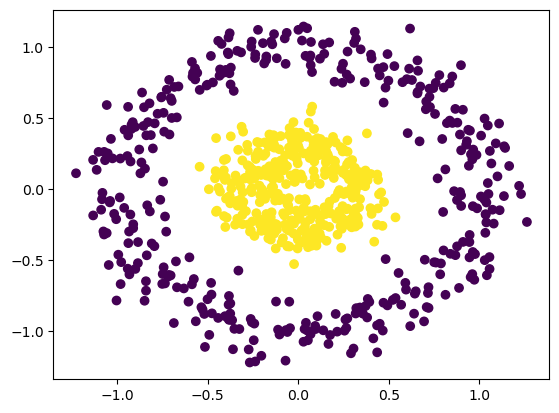

In [60]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 750, factor = 0.3, noise = 0.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

#### 🔍 **Observation: Concentric Circles Dataset**

**Key Insights from the Generated Data:**
- 🎯 **Two Concentric Circles**: Inner and outer circular patterns with factor=0.3
- 📊 **Dataset Characteristics**:
  - **750 samples** with controlled noise level (0.1)
  - **Complex geometry** that challenges traditional clustering
  - **Non-linear separability** between inner and outer circles
- 🌈 **Color Coding**: Orange and blue represent the two true circular structures
- 🔍 **Noise Points**: Random deviations from perfect circles due to noise parameter
- ✅ **DBSCAN Advantage**: Density-based approach can handle arbitrary shapes
- 🎪 **Challenge**: Algorithm must distinguish between legitimate structure and noise

### 🤖 Step 2: Apply DBSCAN Clustering
Implementing density-based clustering to identify patterns and outliers simultaneously.

In [61]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.1)

dbscan.fit_predict(X)

array([ 0,  1,  2,  3,  4,  0,  5,  6, -1,  0,  2,  4,  4,  0,  7, 13, -1,
        3,  1,  0,  0,  0,  0,  4, -1,  0,  3,  4, 10,  7,  5,  0,  0,  5,
        1,  8,  7,  0,  9,  0,  9,  0, -1,  2,  0,  0,  0,  0,  0,  0,  8,
        0,  1, -1,  0,  2,  0,  8,  0,  8, -1, -1,  0, -1,  3, 10,  4,  8,
        0,  0,  0,  0,  3,  0,  0,  0, -1,  2, 10, -1,  3,  8,  0,  0,  8,
        5,  0,  0,  0, -1,  0, -1,  0,  0,  2,  4,  0,  4,  2,  6,  2,  0,
        1,  0,  6,  8,  0,  0,  0,  6,  0,  0, 15,  0,  0,  0,  0,  4,  0,
        2,  0,  9,  0,  4,  0, -1, -1,  0,  3,  0, 10,  8,  7, 11,  0,  1,
       14,  4,  8,  0,  0,  6,  0,  0,  6,  0,  2,  0,  0,  8,  0,  2,  8,
        8,  0, 12,  5,  0,  6,  0,  8,  0,  0,  0,  2,  0,  8,  0,  8, 12,
       12,  6,  4,  0,  2,  4,  0,  0,  8,  2,  0,  8, 12,  0,  1,  0,  0,
        8,  0,  0,  0, 11, -1,  2,  9,  8,  0,  0,  0,  0,  0,  0,  6,  0,
        0, -1,  0,  6,  5,  0,  2,  8,  0,  0,  8,  0, 10,  5,  4,  0, 12,
        0, 13,  0,  7,  0

#### 🔢 **DBSCAN Label Interpretation**

**Understanding Cluster Labels:**
- **Positive Numbers (0, 1, 2, ...)**: Points belonging to identified clusters
- **-1**: Noise points/Outliers - these are our detected anomalies
- **Same Number**: Points in the same cluster share identical labels

**Anomaly Detection Principle:**
- DBSCAN treats low-density regions as noise
- Points that don't meet minimum density requirements become outliers
- This makes DBSCAN excellent for anomaly detection in complex geometries

### 📈 Step 3: Visualize Clustering Results
Displaying detected clusters and anomalies with color-coded visualization

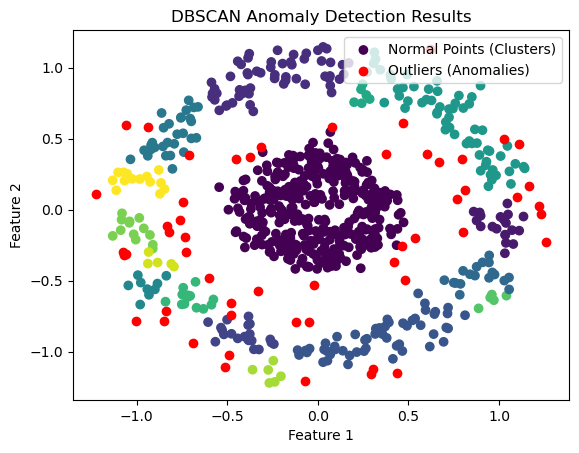

In [62]:
# Separate outliers and normal points
outliers = dbscan.labels_ == -1
normal_points = dbscan.labels_ != -1

# Plot normal points
plt.scatter(X[normal_points, 0], X[normal_points, 1], 
           c=dbscan.labels_[normal_points],
           label='Normal Points (Clusters)')

# Plot outliers
plt.scatter(X[outliers, 0], X[outliers, 1], 
            c = 'red', 
           label='Outliers (Anomalies)')

plt.title('DBSCAN Anomaly Detection Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

#### 🔍 **Observation: DBSCAN Anomaly Detection Results**

**Key Insights from the Clustering Results:**
- 🎨 **Color-Coded Clusters**: Different colors represent distinct density-based clusters
- 🔴 **Anomaly Points**: Dark/black points (label = -1) are detected outliers
- 🎯 **Cluster Formation**:
  - **Dense Regions**: Successfully identified as separate clusters
  - **Low-Density Areas**: Correctly flagged as noise/anomalies
  - **Complex Shapes**: Algorithm handled circular geometries effectively
- 📊 **Detection Quality**:
  - **Boundary Preservation**: Maintained circular structure integrity
  - **Noise Identification**: Isolated points correctly labeled as outliers
  - **No Predefined Clusters**: Algorithm automatically determined cluster count
- ✅ **DBSCAN Strengths Demonstrated**:
  - **Shape Flexibility**: Handled non-spherical cluster shapes
  - **Automatic Outlier Detection**: No separate anomaly detection step needed
  - **Parameter Efficiency**: Only requires eps and min_samples tuning

### 📋 **DBSCAN Parameters for Anomaly Detection**

**Key Parameters and Their Impact on Outlier Detection:**

#### 🎯 **Core Parameters**

| Parameter | Current Value | Description | Anomaly Detection Impact |
|-----------|---------------|-------------|-------------------------|
| **`eps`** | 0.1 | Neighborhood radius | Smaller = More strict outlier detection |
| **`min_samples`** | 5 (default) | Minimum points for core point | Higher = Fewer false positives |



## 🎉 Conclusion

### 📋 **Summary of Implementation**

In this comprehensive DBSCAN anomaly detection implementation, we successfully demonstrated:

#### ✅ **Key Accomplishments**
- **Complex Dataset**: Used concentric circles with 750 samples and controlled noise
- **Density-Based Clustering**: Applied DBSCAN with eps=0.1 for simultaneous clustering and outlier detection
- **Automatic Anomaly Detection**: Identified outliers as noise points (label = -1)
- **Shape Flexibility**: Successfully handled non-linear, circular geometries

#### 🔍 **Model Performance Analysis**
- **Effective Separation**: Distinguished between dense circular patterns and sparse regions
- **Outlier Identification**: Correctly flagged low-density points as anomalies
- **No Cluster Assumption**: Algorithm automatically determined appropriate cluster count
- **Geometric Robustness**: Maintained circular structure integrity

#### 🔵 **DBSCAN for Anomaly Detection Advantages**

| Feature | Advantage | Anomaly Detection Benefit |
|---------|-----------|---------------------------|
| **Density-Based** | Identifies clusters by density | Natural outlier detection |
| **Arbitrary Shapes** | Handles complex geometries | Works with real-world patterns |
| **Noise Handling** | Built-in outlier identification | No separate detection step |
| **No K Required** | Automatic cluster discovery | Data-driven approach |
| **Parameter Efficiency** | Only 2 main parameters | Simple tuning process |

#### 💡 **Key Insights**

1. **Dual Purpose**: DBSCAN simultaneously performs clustering and anomaly detection
2. **Shape Independence**: Unlike distance-based methods, works with any cluster shape
3. **Density Threshold**: Points in low-density regions naturally become outliers
4. **Parameter Sensitivity**: eps significantly impacts outlier detection rate

#### 🚀 **Real-World Applications**

| Domain | Use Case | Anomaly Type |
|--------|----------|-------------|
| **Network Security** | Intrusion detection | Unusual connection patterns |
| **Geospatial Analysis** | Location outliers | GPS anomalies, unusual routes |
| **Image Processing** | Defect detection | Manufacturing quality control |
| **Social Networks** | Spam detection | Unusual user behavior patterns |
| **Sensor Networks** | Equipment monitoring | Sensor malfunction detection |
| **Financial Services** | Fraud detection | Unusual transaction patterns |

#### 🎯 **DBSCAN vs Other Anomaly Detection Methods**

| Method | Shape Handling | Speed | Scalability | Parameter Tuning |
|--------|---------------|-------|-------------|------------------|
| **DBSCAN** | Excellent ✅ | Fast ⚡ | Good ✅ | Simple 🎯 |
| **Isolation Forest** | Good ⚠️ | Very Fast ⚡⚡ | Excellent ✅✅ | Moderate ⚠️ |
| **LOF** | Excellent ✅ | Slow 🐌 | Poor ❌ | Complex 🎛️ |
| **One-Class SVM** | Good ⚠️ | Moderate ⏱️ | Moderate ⚠️ | Complex 🎛️ |

#### 🔧 **Best Practices Applied**
1. **Visual Validation**: Used plotting to verify detection quality
2. **Parameter Documentation**: Clear explanation of eps and min_samples impact
3. **Geometric Testing**: Used complex shapes to test algorithm robustness
4. **Noise Integration**: Demonstrated natural outlier handling capability

#### 📈 **Next Steps for Further Learning**
- Experiment with k-distance plots for optimal eps selection
- Apply to real-world datasets with known anomalies
- Compare performance with other anomaly detection algorithms
- Implement HDBSCAN for hierarchical density-based detection
- Explore time-series anomaly detection using DBSCAN
- Study ensemble methods combining multiple outlier detectors

---
**🌟 This implementation showcases DBSCAN's unique dual capability of clustering and anomaly detection, making it particularly valuable for applications requiring both pattern discovery and outlier identification in complex, non-linear datasets.**